Install Required Libraries

In [16]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn nltk textblob TA-Lib pynance

  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
  Using cached TA-Lib-0.5.1.tar.gz (369 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pynance-1.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached pandas_datareader-0.10.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached mplfinance-0.12.10b0-py3-none-any.whl.metadata (19 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
Using cached pynance-1.0.0-py3-none-any.whl (42 kB)
Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Using cached mplfinance-0.12.10b0-py3-none-any.whl (75 kB)
Failed to build TA-Lib


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [28 lines of output]
  <string>:75: UserWarning: Cannot find ta-lib library, installation may fail.
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\talib
  copying talib\abstract.py -> build\lib.win-amd64-cpython-312\talib
  copying talib\deprecated.py -> build\lib.win-amd64-cpython-312\talib
  copying talib\stream.py -> build\lib.win-amd64-cpython-312\talib
  copying talib\__init__.py -> build\lib.win-amd64-cpython-312\talib
  running egg_info
  writing ta_lib.egg-info\PKG-INFO
  writing dependency_links to ta_lib.egg-info\dependency_links.txt
  writing requirements to ta_lib.egg-info\requires.txt
  writing top-level names to ta_lib.egg-info\top_level.txt
  reading manifest file 'ta_lib.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LICENSE'
  adding license file 'AUTHORS'
  writing manifest file 'ta_lib.egg-info\SOURCES.txt'
  copyin

Initialize Notebook
Set up imports and environment variables.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import talib

ModuleNotFoundError: No module named 'textblob'

Task 1: Data Understanding & Exploratory Data Analysis (EDA)
Load the Dataset

In [26]:
# Load financial news dataset
data_analyst_ratings = pd.read_csv("raw_analyst_ratings.csv")
data_aapl = pd.read_csv("AAPL_historical_data.csv")
data_amzn = pd.read_csv("AMZN_historical_data.csv")
data_meta = pd.read_csv("META_historical_data.csv")
data_goog = pd.read_csv("GOOG_historical_data.csv")
data_nvda = pd.read_csv("NVDA_historical_data.csv")
data_tsla = pd.read_csv("TSLA_historical_data.csv")
data_msft = pd.read_csv("MSFT_historical_data.csv")

2. Use a Dictionary for Clean Management
To make it easier to handle multiple datasets, load them into a dictionary:

In [28]:
# Define a dictionary to store the datasets
datasets = {
    "analyst_ratings": "raw_analyst_ratings.csv",
    "AAPL": "AAPL_historical_data.csv",
    "AMZN": "AMZN_historical_data.csv",
    "META": "META_historical_data.csv",
    "GOOG": "GOOG_historical_data.csv",
    "NVDA": "NVDA_historical_data.csv",
    "TSLA": "TSLA_historical_data.csv",
    "MSFT": "MSFT_historical_data.csv"
}

# Load datasets into the dictionary
dataframes = {name: pd.read_csv(file) for name, file in datasets.items()}

# Access each dataset by its name
print(dataframes["AAPL"].head())  # Print first 5 rows of AAPL data

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [34]:
# Access each dataset by its name
print(dataframes["AMZN"].head())  # Print first 5 rows of AAPL data

         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [36]:
# Access each dataset by its name
print(dataframes["META"].head())  # Print first 5 rows of METAdata

         Date       Open       High        Low      Close  Adj Close  \
0  2012-12-12  28.000000  28.139999  27.370001  27.580000  27.523441   
1  2012-12-13  27.590000  28.750000  27.430000  28.240000  28.182087   
2  2012-12-14  28.180000  28.330000  26.760000  26.809999  26.755020   
3  2012-12-17  26.770000  27.000000  26.320000  26.750000  26.695143   
4  2012-12-18  26.959999  27.910000  26.900000  27.709999  27.653173   

     Volume  Dividends  Stock Splits  
0  46704200        0.0           0.0  
1  81051600        0.0           0.0  
2  91631600        0.0           0.0  
3  57742500        0.0           0.0  
4  60512900        0.0           0.0  


In [38]:
# Access each dataset by its name
print(dataframes["GOOG"].head())  # Print first 5 rows of GOOG data

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [40]:
# Access each dataset by its name
print(dataframes["NVDA"].head())  # Print first 5 rows of NVDA data

         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1  1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
2  1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   
3  1999-01-27  0.041927  0.042969  0.039583  0.041667   0.038218   244368000   
4  1999-01-28  0.041667  0.041927  0.041276  0.041536   0.038098   227520000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [42]:
# Access each dataset by its name
print(dataframes["TSLA"].head())  # Print first 5 rows of TSLA data

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [44]:
# Access each dataset by its name
print(dataframes["MSFT"].head())  # Print first 5 rows of MSFT data

         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.059946  1031788800   
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.062087   308160000   
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.063158   133171200   
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.061552    67766400   
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.060482    47894400   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Data Overview
Column Summary

In [46]:
for name, df in dataframes.items():
    print(f"{name} columns: {df.columns.tolist()}")

analyst_ratings columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']
AAPL columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
AMZN columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
META columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
GOOG columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
NVDA columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
TSLA columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
MSFT columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']


Check Missing Values

In [48]:
for name, df in dataframes.items():
    print(f"{name} missing values:\n{df.isnull().sum()}")
    

analyst_ratings missing values:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64
AAPL missing values:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
AMZN missing values:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
META missing values:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
GOOG missing values:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
NVDA missing values:
Date            0
Open            0
High            0


 Data Cleaning
Ensure uniformity in column formats (e.g., Date as datetime)

In [53]:
for name, df in dataframes.items():
    df['raw_analyst_ratings.csv'] = pd.to_datetime(df['raw_analyst_ratings.csv'])
  

KeyError: 'raw_analyst_ratings.csv'

Handle missing or erroneous data

In [55]:
for name, df in dataframes.items():
    df.dropna(inplace=True)  # Drop rows with NaN

 Exploratory Analysis
Basic Statistics

In [58]:
for name, df in dataframes.items():
    print(f"{name} stats:\n{df.describe()}")

analyst_ratings stats:
         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06
AAPL stats:
               Open          High           Low         Close     Adj Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     22.312754     21.494496   
std       46.003685     46.496031     45.540929     46.037660     45.561916   
min        0.049665      0.049665      0.049107      0.049107      0.037857   
25%        0.299107      0.303710      0.290179      0.298549      0.241840   
50%        0.531250      0.537946      0.522321      0.531250      0.432079   
75%       20.204196     20.389554     19.998036     20.196160     17.253029   
max      236.479996    237.229996    233.089996    234.820007    234.548523   

             Volume     Dividends  Stock Splits  
count  1.099800e+04  10

Check the Columns of the DataFrame

In [63]:
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    print(df.columns)

DataFrame: analyst_ratings
Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
DataFrame: AAPL
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
DataFrame: AMZN
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
DataFrame: META
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
DataFrame: GOOG
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
DataFrame: NVDA
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
DataFrame: TSLA
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
DataFrame: MSFT


Ensure the Column Exists

In [65]:
for name, df in dataframes.items():
    df.columns = df.columns.str.strip().str.lower()  # Remove spaces and convert to lowercase

Check for Parsing Issues

In [67]:
for name, df in dataframes.items():
    print(df.head())

   unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

Handle Missing

In [70]:
for name, df in dataframes.items():
    if df.index.name == 'Date':
        df.reset_index(inplace=True)

DataFrame analyst_ratings is missing required columns.


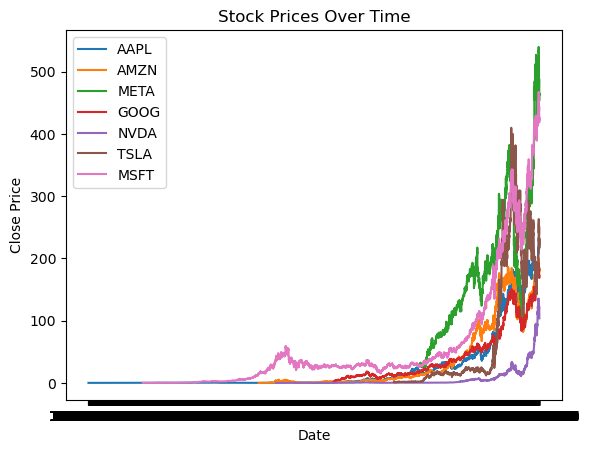

In [72]:
import matplotlib.pyplot as plt

for name, df in dataframes.items():
    if 'date' in df.columns and 'close' in df.columns:
        plt.plot(df['date'], df['close'], label=name)
    else:
        print(f"DataFrame {name} is missing required columns.")

plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Prices Over Time')
plt.show()

Descriptive Statistics
Headline Length
Calculate and visualize the distribution of headline lengths.

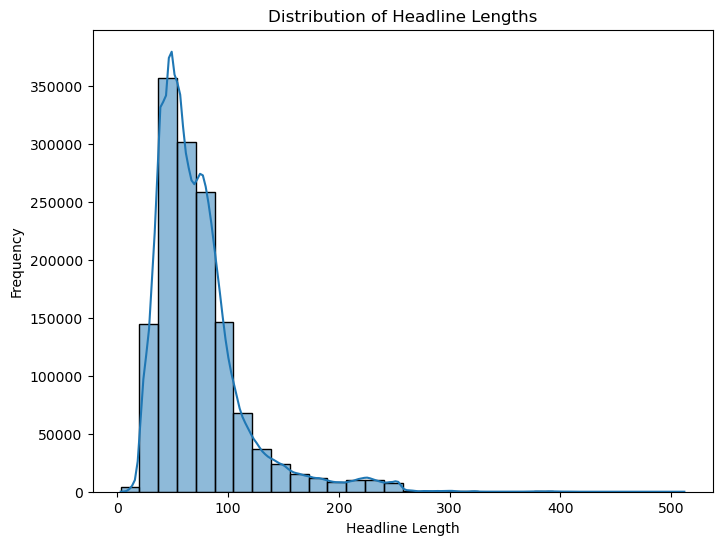

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a column for headline length
data_analyst_ratings['headline_length'] = data_analyst_ratings['headline'].apply(len)

# Plot histogram of headline lengths
plt.figure(figsize=(8, 6))
sns.histplot(data_analyst_ratings['headline_length'], kde=True, bins=30)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.show()

Article Counts by Publisher
Identify the top publishers by the number of articles.

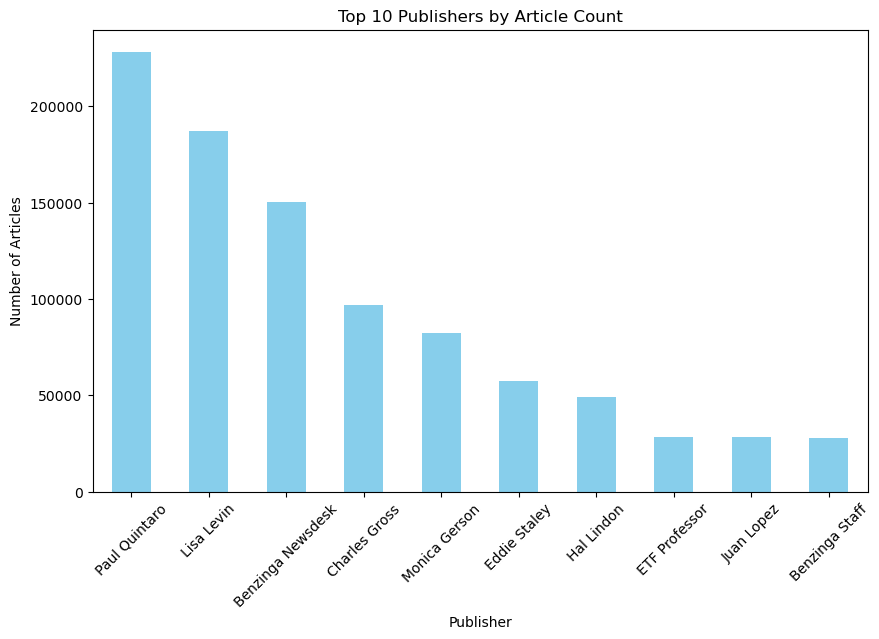

In [88]:
# Count articles by publisher
publisher_counts = data_analyst_ratings['publisher'].value_counts()

# Plot top publishers
plt.figure(figsize=(10, 6))
publisher_counts.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Publishers by Article Count")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

Trends in Publication Dates
Analyze daily, weekly, or monthly trends in publication dates.

In [101]:
# Convert 'date' column to datetime
data_analyst_ratings['date'] = pd.to_datetime(data_analyst_ratings['date'])

# Group data by month and count
monthly_trends = data_analyst_ratings['date'].dt.to_period('M').value_counts().sort_index()

# Plot monthly trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', marker='o')
plt.title("Monthly Trends in News Publication")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.show()

ValueError: time data "2020-05-22 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Step 3: Sentiment Analysis
Preprocess Text
Use nltk or TextBlob for preprocessing (e.g., tokenization, stopword removal, lemmatization).

In [111]:
!pip install textblob
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopword list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess text
def preprocess_text(text):
    tokens = text.split()
    tokens = [word.lower() for word in tokens if word.isalpha() and word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

data_analyst_ratings['cleaned_headline'] = data_analyst_ratings['headline'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Perform Sentiment Analysis
Use TextBlob to assign sentiment scores.

In [ ]:
# Assign sentiment polarity
dataset['sentiment'] = dataset['cleaned_headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment
dataset['sentiment_category'] = dataset['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Preview sentiment
print(dataset[['headline', 'sentiment', 'sentiment_category']].head())